# Epidemics

> Before you start, access the Colab notebook here:
>
> https://colab.research.google.com/drive/1GNAYxBtcHnP4bRTYM3bCN-tm_yU6xA39

## Background

We will develop a simulation which models the spread of a viral infection through a population. Individuals in the population are assumed to be distributed in a grid of cells which might represent a geographical area such as a city or country, and are assigned various states which describe their exposure to the virus. As the simulation progresses, individuals transition between states according to probabilistic rules (see {numref}`fig_project_epidemic`).

```{figure} sample_epidemic.png
---
width: 800px
name: fig_project_epidemic
---
Simulation results for the spread of the infection in a population. The colour of each cell represents its state of infection. Reprinted from {cite}`ghosh2021computational`.
```

The SIR model is one of the most basic models for describing the temporal dynamics of an infectious disease in a population. It compartmentalizes people into one of three categories: those who are Susceptible to the disease, those who are currently Infectious, and those who have Recovered (with immunity). At its most basic level, the SIR model is a set of equations that describes the number (or proportion) of people in each compartment at every point in time. The SIR model is often represented with the following flow diagram that shows the three states (S, I, and R) and arrows depicting the direction of flow between the states.

```{figure} sir_flow.png
---
width: 400px
name: sir_flow
---
In the SIR model, individuals transition between states S (Susceptible), I (Infected) and R (Recovered).
```

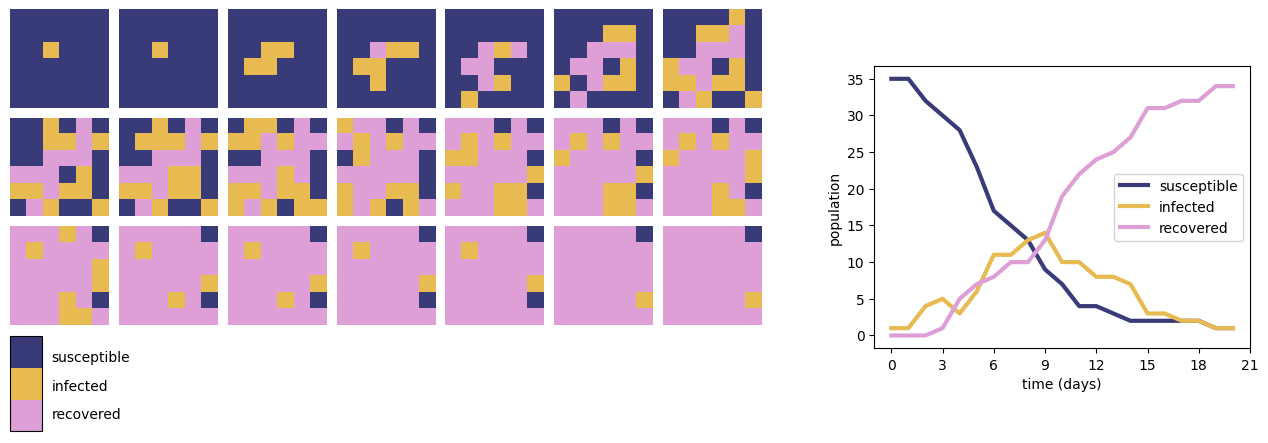

In [1]:
import epidemics as ep
import numpy as np
from myst_nb import glue

N = 8
p = 0.25
q = 0.25

num = 21

grid = np.zeros((N, N))
grid[3, 3] = 1

np.random.seed(0)

grid_all = ep.run_simulation(N, p, q, num, grid)

fig = ep.plot_figures(grid_all[:,1:-1,1:-1], 7, 3)
glue("epidemic_fig", fig, display=False)
#fig = plot_totals(grid_all[:,1:-1,1:-1], 3)


## Simulation

{numref}`epidemic_fig` shows the results of a simple SIR model of infection on a 6 by 6 grid. Each cell represents an individual in one of three states: Susceptible (S), Infected (I) or Recovered (R). Initially all cells are in the susceptible state except one infected individual. At each timestep, each cell changes state according to the following rules:

- A cell in state S which has at least one neighbouring cell in state I changes to state I with probability $p=0.25$, otherwise remains in state S;
- A cell in state I changes to state R with probability $q=0.25$, otherwise remains in state I;
- A cell in state R remains in state R.

In this simulation, we use the definition of a [Moore neighbourhood](https://en.wikipedia.org/wiki/Moore_neighborhood) consisting of a cell and each of its eight immediate surrounding neighbours.

```{glue:figure} epidemic_fig
:figwidth: 800px
:name: epidemic_fig

The results of an SIR epidemic simulation on a 6 by 6 grid (left) and total populations of susceptible, infected and recovered individuals over the timecourse of the simulation (right).
```

## Investigation

> First, open the Colab notebook linked at the top of this page.

The notebook consists of three code cells, "Set up simulation", "Run simulation" and "Display results". We have hidden the code in the first cell since won't be editing it.

> Run the three cells in turn by clicking the "Run cell" button ![run cell](colab_run.png) next to each one. Make sure you wait for each to finish before running the next!

After running "Run simulation" you will see the starting state of the simulation consisting of a single infected individual, and after running "Display Results" you will see an animation of the simulation and a static line graph showing the totals over time.

> Try experimenting with the simulation by changing the parameters `p` and `q`. After changing the values, run the simulation again by running the cells "Run simulation" and "Display Results". The two parameters `p` and `q` are probabilities so make sure you choose numbers between zero and one.

You should find that for some values the infection quickly dies out, and for others values we get a sharp peak of infections (i.e. an epidemic).

The simulation is somewhat unrealistic since it doesn't include births or migration of new indviduals. Let's add a new parameter which controls this situation.

> Paste the following line of code below the other parameters in the code cell "Run simulation".

```
r = 0           # Probability of new individual
```

> Try experimenting with the value of `r`. Don't make the value too big - values less than 0.1 are best. Can you find values of `p`, `q` and `r` which result in repeated "waves" of infection (as we know, this scenario is quite realistic!)

## References

```{bibliography}
:filter: docname in docnames
```